In [4]:
import pandas as pd
import matplotlib as mat
import re


df = pd.read_csv('fifa-data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
wage_data = df[["ID", "Name", "Wage", "Value"]].copy()
wage_data.head()

,ID,Name,Wage,Value
0,158023,L. Messi,€565K,€110.5M
1,20801,Cristiano Ronaldo,€405K,€77M
2,190871,Neymar Jr,€290K,€118.5M
3,193080,De Gea,€260K,€72M
4,192985,K. De Bruyne,€355K,€102M


In [6]:
def get_value(price):
    price_reg = re.compile(r'(\D)*(\d+[.,]?\d?)(\D)*')
    result = re.search(price_reg, price)
    
    value = float(result.group(2))
    denom = result.group(3)

    if denom == "K":
        return value * 1000

    elif denom == "M":
        return value * 1000000

    else:
        return value


wage_data.loc[:, "Value"] = wage_data["Value"].map(get_value, na_action="ignore")
wage_data.loc[:, "Wage"] = wage_data["Wage"].map(get_value, na_action="ignore")

wage_data.loc[:, "Value"] = wage_data["Value"].fillna(0)
wage_data.loc[:, "Wage"] = wage_data["Wage"].fillna(0)

print(wage_data.head())
print(wage_data.head())

       ID               Name      Wage        Value
0  158023           L. Messi  565000.0  110500000.0
1   20801  Cristiano Ronaldo  405000.0   77000000.0
2  190871          Neymar Jr  290000.0  118500000.0
3  193080             De Gea  260000.0   72000000.0
4  192985       K. De Bruyne  355000.0  102000000.0
       ID               Name      Wage        Value
0  158023           L. Messi  565000.0  110500000.0
1   20801  Cristiano Ronaldo  405000.0   77000000.0
2  190871          Neymar Jr  290000.0  118500000.0
3  193080             De Gea  260000.0   72000000.0
4  192985       K. De Bruyne  355000.0  102000000.0


C:\Users\jtass\AppData\Local\Temp\ipykernel_48288\3704929101.py:18: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wage_data.loc[:, "Value"] = wage_data["Value"].map(get_value, na_action="ignore")
C:\Users\jtass\AppData\Local\Temp\ipykernel_48288\3704929101.py:19: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wage_data.loc[:, "Wage"] = wage_data["Wage"].map(get_value, na_action="ignore")


In [7]:
wage_data.loc[:, 'Difference'] =  wage_data.apply(lambda row: int(row['Value']) - int(row['Wage']), axis=1)
wage_data.sort_values("Difference", ascending=0)


,ID,Name,Wage,Value,Difference
2,190871,Neymar Jr,290000.0,118500000.0,118210000
0,158023,L. Messi,565000.0,110500000.0,109935000
4,192985,K. De Bruyne,355000.0,102000000.0,101645000
5,183277,E. Hazard,340000.0,93000000.0,92660000
15,211110,P. Dybala,205000.0,89000000.0,88795000
...,...,...,...,...,...
17752,100899,S. Phillips,1000.0,0.0,-1000
12192,208927,H. Sulaimani,3000.0,0.0,-3000
3550,29552,S. Nakamura,4000.0,0.0,-4000
4228,3665,B. Nivet,5000.0,0.0,-5000


<AxesSubplot: xlabel='Wage', ylabel='Value'>

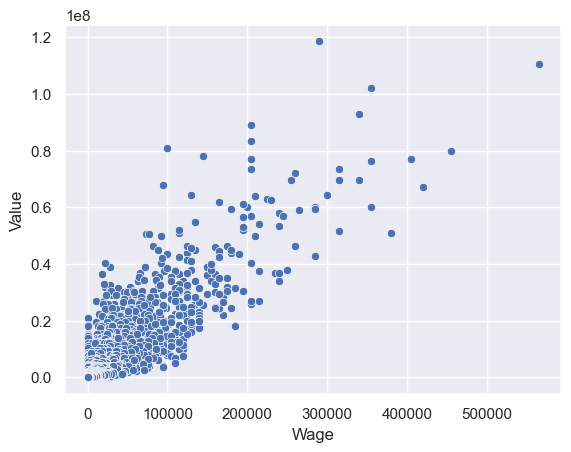

In [8]:
import seaborn as sns

sns.set()

graph = sns.scatterplot(x="Wage", y="Value", data = wage_data)
graph

In [21]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool

tooltips = [
    ('ID', '@id'),
    ('Name', '@name'),
    ('Wage',  '$y{(€ 0.00 a)}'),
    ('Value', '$x{(€ 0.00 a)}')
]

source = ColumnDataSource(data=dict(
    id=wage_data["ID"],
    name=wage_data["Name"],
    y=wage_data["Value"],
    x=wage_data["Wage"]
))

p = figure(title="Value-to-Wage Ratio 2019", x_axis_label='Wage', y_axis_label='Value', tooltips=tooltips)
p.scatter(source=source)

output_notebook()
show(p)

Loading BokehJS ...